In [8]:
import csv
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
file_path = "/Users/bibek/Documents/COVID-19_Project-1/us_counties_covid19_daily.csv"

In [10]:
df = pd.read_csv(file_path)
df

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
800432,2020-12-05,Sweetwater,Wyoming,56037.0,2098,10.0
800433,2020-12-05,Teton,Wyoming,56039.0,1739,2.0
800434,2020-12-05,Uinta,Wyoming,56041.0,1187,5.0
800435,2020-12-05,Washakie,Wyoming,56043.0,519,8.0


In [11]:
#changing the datatype from object to numerical

df['date'] = pd.to_datetime(df['date'])

In [12]:
#Create a new column to group by: 0 for months 1-4, 1 for months 5-8, 2 for months 9-12
df['third'] = (df['date'].dt.month - 1) // 4
# Group by the new 'quarter' column
grouped = df.groupby('third')
# Split into 3 different DataFrames
dfs = [group for _, group in grouped]
dfs

[             date      county       state     fips  cases  deaths  third
 0      2020-01-21   Snohomish  Washington  53061.0      1     0.0      0
 1      2020-01-22   Snohomish  Washington  53061.0      1     0.0      0
 2      2020-01-23   Snohomish  Washington  53061.0      1     0.0      0
 3      2020-01-24        Cook    Illinois  17031.0      1     0.0      0
 4      2020-01-24   Snohomish  Washington  53061.0      1     0.0      0
 ...           ...         ...         ...      ...    ...     ...    ...
 103865 2020-04-30    Sublette     Wyoming  56035.0      3     0.0      0
 103866 2020-04-30  Sweetwater     Wyoming  56037.0     18     0.0      0
 103867 2020-04-30       Teton     Wyoming  56039.0     96     1.0      0
 103868 2020-04-30       Uinta     Wyoming  56041.0      8     0.0      0
 103869 2020-04-30    Washakie     Wyoming  56043.0      7     0.0      0
 
 [103870 rows x 7 columns],
              date      county    state     fips  cases  deaths  third
 103870 202

In [13]:
#changing to dataframe
my_data = dfs[1]
my_data

,date,county,state,fips,cases,deaths,third
103870,2020-05-01,Autauga,Alabama,1001.0,42,3.0,1
103871,2020-05-01,Baldwin,Alabama,1003.0,175,4.0,1
103872,2020-05-01,Barbour,Alabama,1005.0,42,1.0,1
103873,2020-05-01,Bibb,Alabama,1007.0,42,0.0,1
103874,2020-05-01,Blount,Alabama,1009.0,39,0.0,1
...,...,...,...,...,...,...,...
489191,2020-08-31,Sweetwater,Wyoming,56037.0,302,2.0,1
489192,2020-08-31,Teton,Wyoming,56039.0,430,1.0,1
489193,2020-08-31,Uinta,Wyoming,56041.0,298,2.0,1
489194,2020-08-31,Washakie,Wyoming,56043.0,107,5.0,1


In [14]:
# Print the number of rows for each DataFrame
for i, df in enumerate(dfs):
    print(f'Number of rows in DataFrame for quarter {i+1}: {len(df)}')

Number of rows in DataFrame for quarter 1: 103870
Number of rows in DataFrame for quarter 2: 385326
Number of rows in DataFrame for quarter 3: 311241


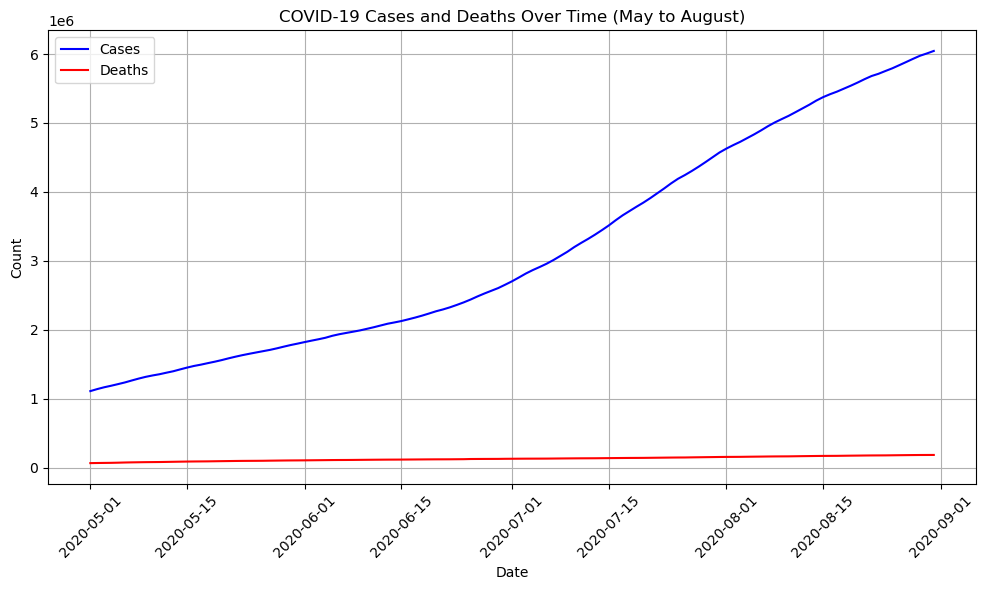

,cases,deaths
date,,
2020-05-01,1109728,64902.0
2020-05-02,1139202,66485.0
2020-05-03,1165342,67816.0
2020-05-04,1187304,68905.0
2020-05-05,1211011,71139.0
...,...,...
2020-08-27,5884366,180729.0
2020-08-28,5930930,181739.0
2020-08-29,5975540,182610.0


In [15]:

df = pd.read_csv(file_path)
df['date'] = pd.to_datetime(df['date'])

# Filter data for the months of May to August (months 5 to 8)
may_to_aug_data = df[(df['date'].dt.month >= 5) & (df['date'].dt.month <= 8)]

# Group the filtered data by date and sum the cases and deaths
grouped_by_date = may_to_aug_data.groupby('date')[['cases', 'deaths']].sum()

# Create a line plot for cases and deaths over time (May to August)
plt.figure(figsize=(10, 6))
plt.plot(grouped_by_date.index, grouped_by_date['cases'], label='Cases', color='blue')
plt.plot(grouped_by_date.index, grouped_by_date['deaths'], label='Deaths', color='red')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('COVID-19 Cases and Deaths Over Time (May to August)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
grouped_by_date


In [16]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = "/Users/bibek/Documents/COVID-19_Project-1/us_counties_covid19_daily.csv"
df = pd.read_csv(file_path)

# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Filter data for the months of May to August (months 5 to 8)
may_to_aug_data = df[(df['date'].dt.month >= 5) & (df['date'].dt.month <= 8)]

# Group by county and sum the cases and deaths
grouped_by_county = may_to_aug_data.groupby('county')[['cases', 'deaths']].sum()

# Find the county with the highest cases and deaths
county_with_highest_cases = grouped_by_county.sort_values(by='cases', ascending=False).head(1)
county_with_highest_deaths = grouped_by_county.sort_values(by='deaths', ascending=False).head(1)
county_with_lowest_cases = grouped_by_county.sort_values(by='cases').head(1)
county_with_lowest_deaths = grouped_by_county.sort_values(by='deaths').head(1)




In [17]:
county_with_highest_cases

,cases,deaths
county,,
New York City,26729841,2701793.0


In [18]:
county_with_highest_deaths

,cases,deaths
county,,
New York City,26729841,2701793.0


In [19]:
county_with_lowest_cases

,cases,deaths
county,,
Loup,7,0.0


In [20]:
county_with_lowest_deaths

,cases,deaths
county,,
Lajas,5927,0.0


In [21]:
df['date'] = pd.to_datetime(df['date'])

# Filter data for the months of May to August (months 5 to 8)
may_to_aug_data = df[(df['date'].dt.month >= 5) & (df['date'].dt.month <= 8)]

# Group by state and sum the cases and deaths
grouped_by_state = may_to_aug_data.groupby('state')[['cases', 'deaths']].sum()
grouped_by_state.head(10)


,cases,deaths
state,,
Alabama,6446514,135454.0
Alaska,257763,1873.0
Arizona,11770963,275343.0
Arkansas,3158610,38938.0
California,37955054,837148.0
Colorado,4404995,196718.0
Connecticut,5541987,500174.0
Delaware,1455691,56436.0
District of Columbia,1260219,62959.0


In [22]:


# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Filter data for the months of May to August (months 5 to 8)
may_to_aug_data = df[(df['date'].dt.month >= 5) & (df['date'].dt.month <= 8)]

# Group by state and sum the deaths
grouped_by_state = may_to_aug_data.groupby('state')['deaths'].sum()

# Sort states by deaths in descending order
states_sorted_by_deaths = grouped_by_state.sort_values(ascending=False)

# Create a DataFrame for the top 10 states by deaths
top_10_states_by_deaths_df = pd.DataFrame({'Total Deaths (May to August)': states_sorted_by_deaths.head(10)})


top_10_states_by_deaths_df.head(10)

,Total Deaths (May to August)
state,
New York,3773494.0
New Jersey,1673159.0
Massachusetts,933165.0
California,837148.0
Illinois,798528.0
Pennsylvania,772568.0
Michigan,729254.0
Florida,586048.0
Texas,549536.0


In [23]:


# Filter data for the months of May to August (months 5 to 8)
may_to_aug_data = df[(df['date'].dt.month >= 5) & (df['date'].dt.month <= 8)]

# Group by state and sum the deaths
grouped_by_state = may_to_aug_data.groupby('state')['deaths'].sum()

# Sort states by deaths in descending order
states_sorted_by_deaths = grouped_by_state.sort_values(ascending=False)

# Create a DataFrame from the Series
states_sorted_by_deaths_df = states_sorted_by_deaths.reset_index(name='Total Deaths (May to August)')


states_sorted_by_deaths_df.head(10)

,state,Total Deaths (May to August)
0,New York,3773494.0
1,New Jersey,1673159.0
2,Massachusetts,933165.0
3,California,837148.0
4,Illinois,798528.0
5,Pennsylvania,772568.0
6,Michigan,729254.0
7,Florida,586048.0
8,Texas,549536.0
9,Connecticut,500174.0


<Figure size 1000x600 with 0 Axes>

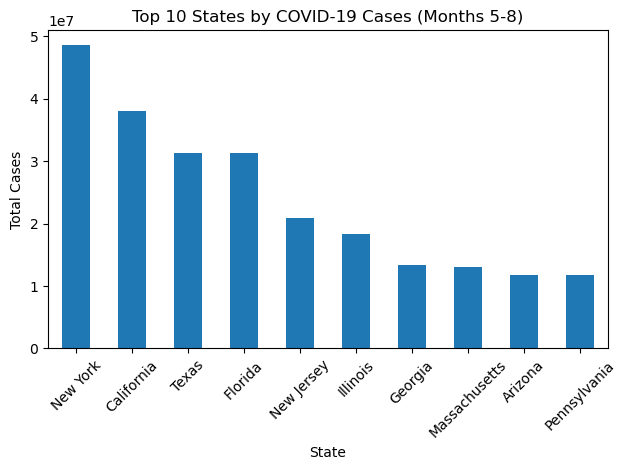

,cases
state,
New York,48526651
California,37955054
Texas,31270932
Florida,31250162
New Jersey,20878801
Illinois,18313547
Georgia,13394247
Massachusetts,13070730
Arizona,11770963


In [38]:

# Group by state and sum the cases
grouped_by_state = my_data.groupby('state')[['cases']].sum()

# Sort states by total cases in descending order
top_states = grouped_by_state.sort_values(by='cases', ascending=False).head(10)

# Create a bar chart for top 10 states
plt.figure(figsize=(10, 6))
top_states.plot(kind='bar', legend=None,)
plt.xlabel('State')
plt.ylabel('Total Cases')
plt.title('Top 10 States by COVID-19 Cases (Months 5-8)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
top_states

<Figure size 1000x600 with 0 Axes>

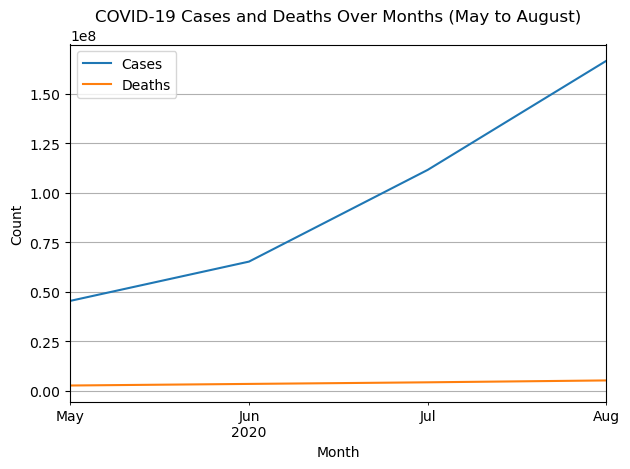

,cases,deaths
date,,
2020-05,45452114,2695246.0
2020-06,65288844,3498937.0
2020-07,111626136,4307836.0
2020-08,166758521,5259820.0


In [39]:


# Group the filtered data by month and sum the cases and deaths
grouped_by_month = may_to_aug_data.groupby(may_to_aug_data['date'].dt.to_period('M'))[['cases', 'deaths']].sum()

# Create a line plot for cases and deaths over months (May to August)
plt.figure(figsize=(10, 6))
grouped_by_month.plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('COVID-19 Cases and Deaths Over Months (May to August)')
plt.legend(['Cases', 'Deaths'])
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
grouped_by_month


In [26]:


# Group by date and calculate daily cases and deaths
grouped_by_date = may_to_aug_data.groupby('date').agg({'cases': 'sum', 'deaths': 'sum'}).reset_index()

# Calculate average and median daily cases and deaths
average_daily_cases = grouped_by_date['cases'].mean()
median_daily_cases = grouped_by_date['cases'].median()
average_daily_deaths = grouped_by_date['deaths'].mean()
median_daily_deaths = grouped_by_date['deaths'].median()

# Create a summary DataFrame
summary_data = pd.DataFrame({
    'Metric': ['Average Daily Cases', 'Median Daily Cases', 'Average Daily Deaths', 'Median Daily Deaths'],
    'Value': [average_daily_cases, median_daily_cases, average_daily_deaths, median_daily_deaths]
})

summary_data['Value'] = summary_data['Value'].round(2)


summary_data

,Metric,Value
0,Average Daily Cases,3163622.89
1,Median Daily Cases,2703296.00
2,Average Daily Deaths,128145.03
3,Median Daily Deaths,128104.00


<Figure size 1000x600 with 0 Axes>

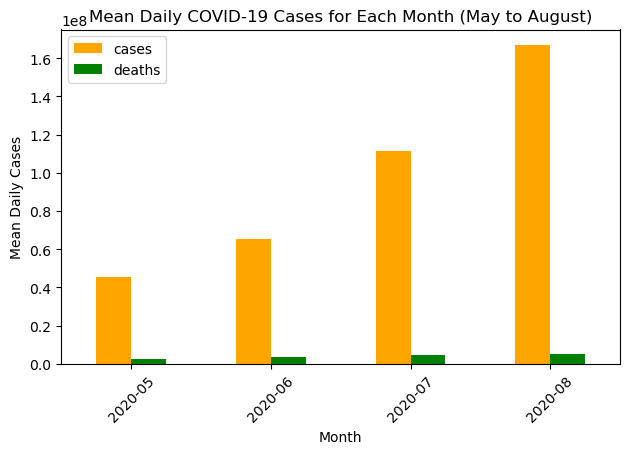

In [27]:
# Create a bar plot for the mean of daily cases for each month
plt.figure(figsize=(10, 6))
grouped_by_month.plot(kind='bar', color=['orange', 'green'])
plt.xlabel('Month')
plt.ylabel('Mean Daily Cases')
plt.title('Mean Daily COVID-19 Cases for Each Month (May to August)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/2g/vfsnvy851l7b7jht_0925gdr0000gn/T/ipykernel_5087/2062400460.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  may_to_aug_data['quarter'] = (may_to_aug_data['date'].dt.month - 1) // 4


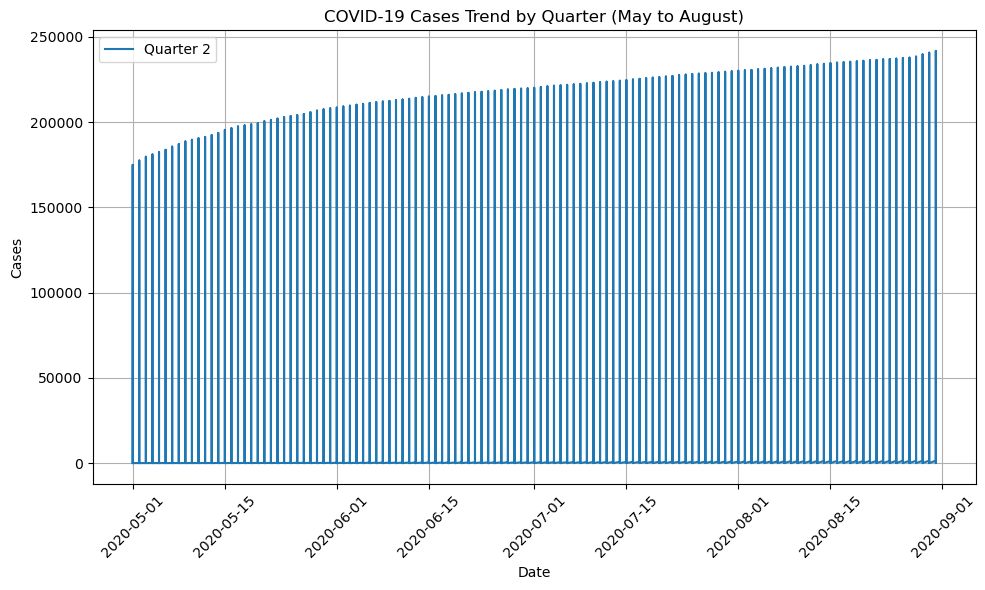

In [28]:


# Filter data for the months of May to August (months 5 to 8)
may_to_aug_data = df[(df['date'].dt.month >= 5) & (df['date'].dt.month <= 8)]

# Create a new column to group by: 0 for months 1-4, 1 for months 5-8, 2 for months 9-12
may_to_aug_data['quarter'] = (may_to_aug_data['date'].dt.month - 1) // 4

# Group by the new 'quarter' column
grouped = may_to_aug_data.groupby('quarter')

# Create a line plot to show the trend of COVID-19 cases over time for each quarter
plt.figure(figsize=(10, 6))

for i, group in enumerate(grouped):
    quarter_number, quarter_data = group
    plt.plot(quarter_data['date'], quarter_data['cases'], label=f'Quarter {quarter_number + 1}')

plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('COVID-19 Cases Trend by Quarter (May to August)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


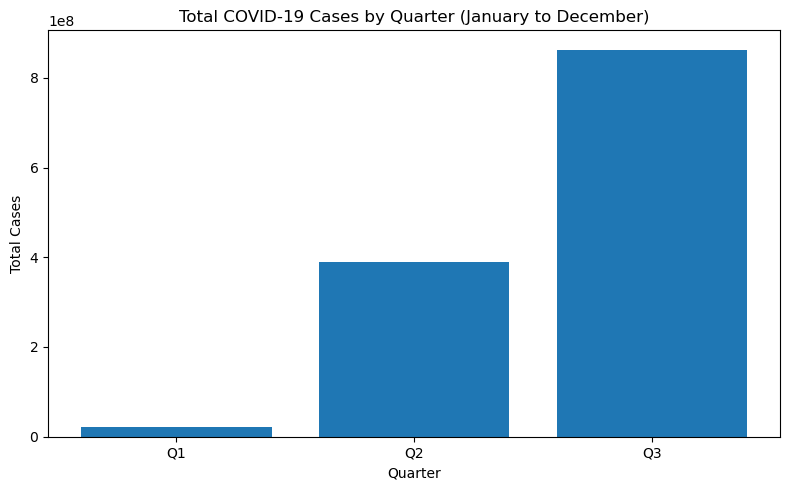

In [29]:


# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Create a new column to group by: 0 for months 1-4, 1 for months 5-8, 2 for months 9-12
df['quarter'] = (df['date'].dt.month - 1) // 4

# Group by the new 'quarter' column and calculate total cases for each quarter
grouped = df.groupby('quarter')['cases'].sum()

# Create a bar plot to compare the total COVID-19 cases for each quarter
plt.figure(figsize=(8, 5))
quarters = ['Q1', 'Q2', 'Q3']
plt.bar(quarters, grouped)
plt.xlabel('Quarter')
plt.ylabel('Total Cases')
plt.title('Total COVID-19 Cases by Quarter (January to December)')

plt.tight_layout()
plt.show()


/var/folders/2g/vfsnvy851l7b7jht_0925gdr0000gn/T/ipykernel_5087/768009379.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  may_to_aug_data['quarter'] = (may_to_aug_data['date'].dt.month - 1) // 4


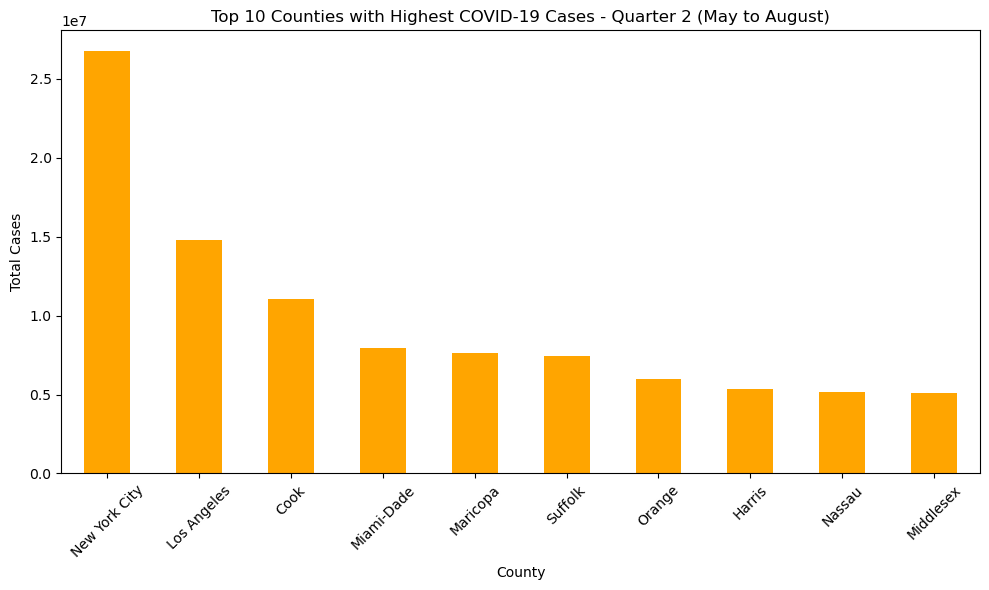

In [30]:


# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Filter data for the months of May to August (months 5 to 8)
may_to_aug_data = df[(df['date'].dt.month >= 5) & (df['date'].dt.month <= 8)]

# Create a new column to group by: 0 for months 1-4, 1 for months 5-8, 2 for months 9-12
may_to_aug_data['quarter'] = (may_to_aug_data['date'].dt.month - 1) // 4

# Choose the desired quarter (0, 1, or 2)
selected_quarter = 1

# Filter data for the selected quarter
quarter_data = may_to_aug_data[may_to_aug_data['quarter'] == selected_quarter]

# Group by county and calculate total cases for each county
grouped = quarter_data.groupby('county')['cases'].sum()

# Sort counties by total cases and select the top 10
top_counties = grouped.nlargest(10)

# Create a bar plot to display the top 10 counties with the highest cases
plt.figure(figsize=(10, 6))
top_counties.plot(kind='bar', color='orange')
plt.xlabel('County')
plt.ylabel('Total Cases')
plt.title(f'Top 10 Counties with Highest COVID-19 Cases - Quarter {selected_quarter + 1} (May to August)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


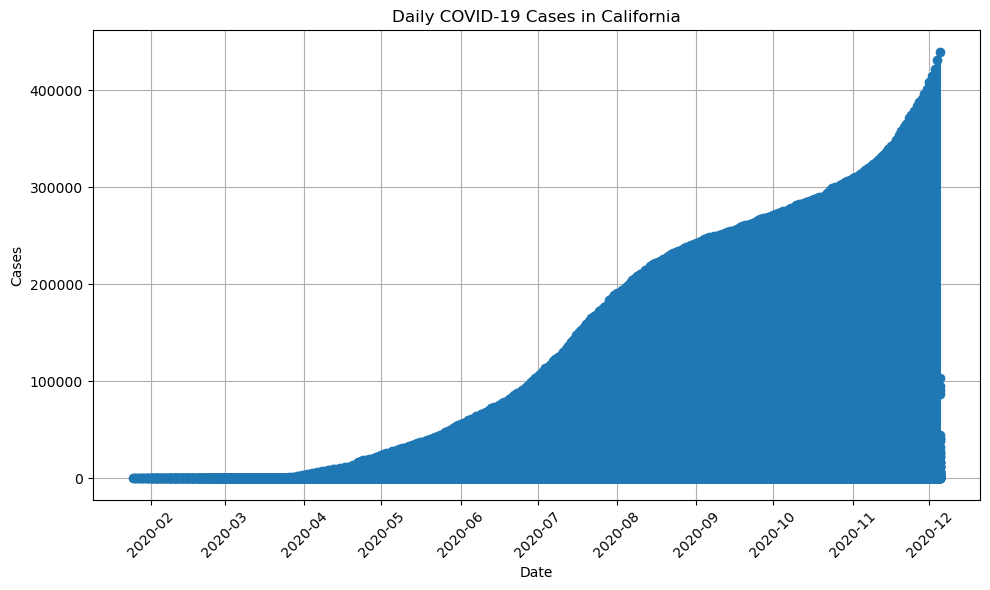

In [31]:


# Choose the desired state
selected_state = 'California'

# Filter data for the selected state
state_data = df[df['state'] == selected_state]

# Create a line plot to show the daily COVID-19 cases for the selected state
plt.figure(figsize=(10, 6))
plt.plot(state_data['date'], state_data['cases'], marker='o')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.title(f'Daily COVID-19 Cases in {selected_state}')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


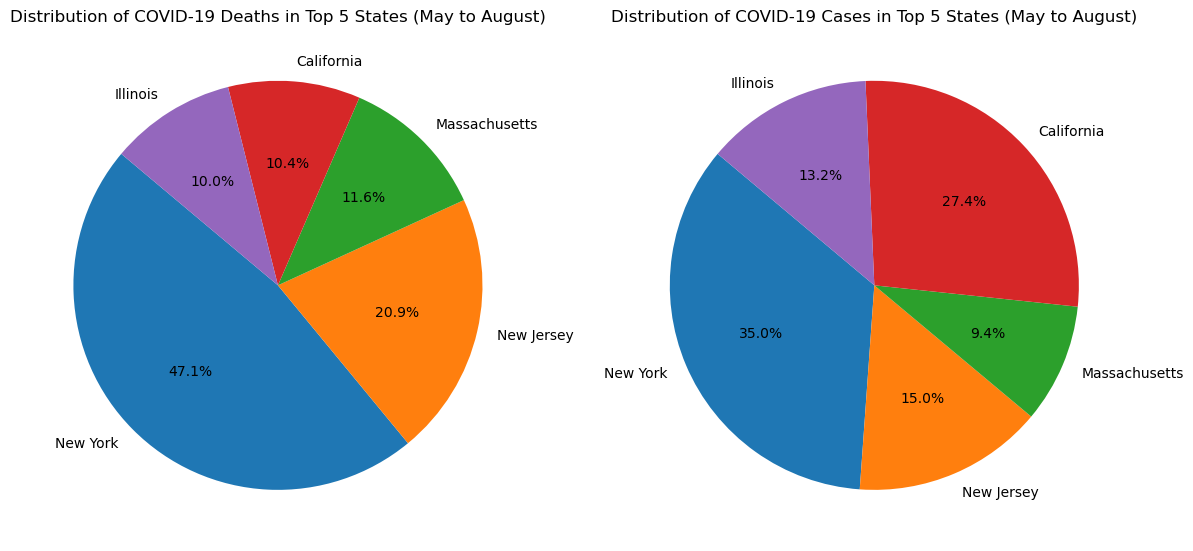

In [32]:


# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Filter data for the months of May to August (months 5 to 8)
may_to_aug_data = df[(df['date'].dt.month >= 5) & (df['date'].dt.month <= 8)]

# Group by state and sum the cases and deaths for May to August
grouped_by_state = may_to_aug_data.groupby('state')[['cases', 'deaths']].sum()

# Sort states by total deaths and select the top 5
top_states = grouped_by_state.nlargest(5, 'deaths')

# Create a pie chart for the distribution of deaths in top 5 states
plt.figure(figsize=(12, 7))
plt.subplot(1, 2, 1)
plt.pie(top_states['deaths'], labels=top_states.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of COVID-19 Deaths in Top 5 States (May to August)')

# Create a pie chart for the distribution of cases in top 5 states
plt.subplot(1, 2, 2)
plt.pie(top_states['cases'], labels=top_states.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of COVID-19 Cases in Top 5 States (May to August)')

plt.tight_layout()
plt.show()


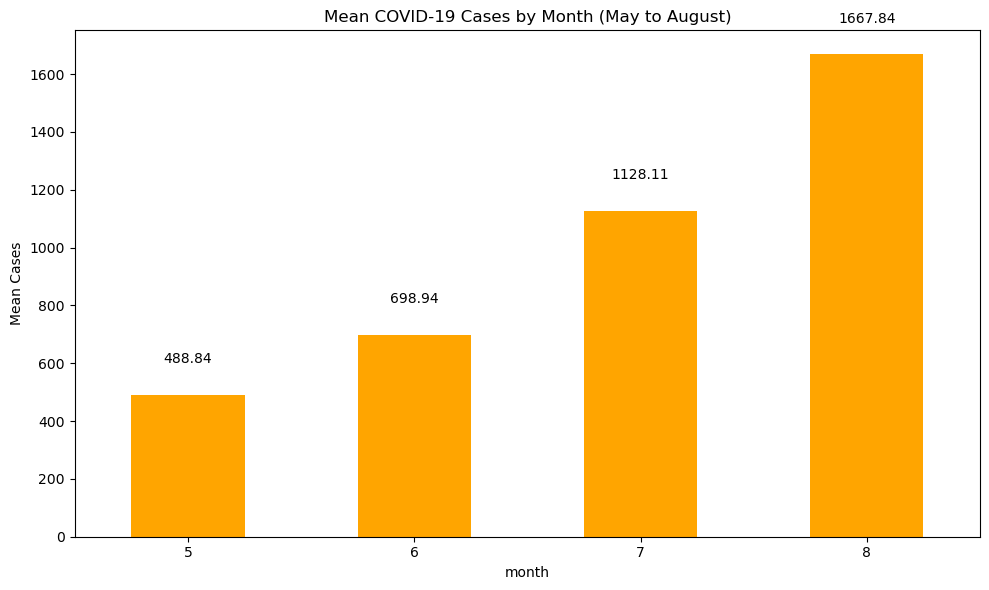

date
5     488.837535
6     698.941709
7    1128.106478
8    1667.835385
Name: cases, dtype: float64

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
file_path = "/Users/bibek/Documents/COVID-19_Project-1/us_counties_covid19_daily.csv"
df = pd.read_csv(file_path)

# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Filter data for the months of May to August (months 5 to 8)
may_to_aug_data = df[(df['date'].dt.month >= 5) & (df['date'].dt.month <= 8)]

# Group by month and calculate the mean cases for each month
grouped_by_month = may_to_aug_data.groupby(may_to_aug_data['date'].dt.month)['cases'].mean()

# Create a bar chart for mean cases by month
plt.figure(figsize=(10, 6))
grouped_by_month.plot(kind='bar', color='orange')
plt.xlabel('month')
plt.ylabel('Mean Cases')
plt.title('Mean COVID-19 Cases by Month (May to August)')
plt.xticks(rotation=0)
plt.tight_layout()

# Annotate bars with values
for index, value in enumerate(grouped_by_month):
    plt.text(index, value + 100, str(round(value, 2)), ha='center', va='bottom', fontsize=10)

plt.show()
grouped_by_month

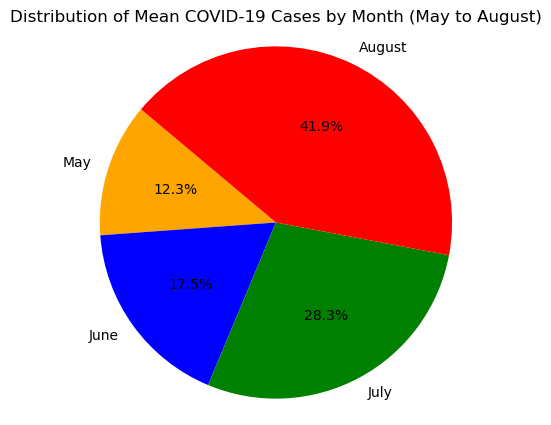

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
file_path = "/Users/bibek/Documents/COVID-19_Project-1/us_counties_covid19_daily.csv"
df = pd.read_csv(file_path)

# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Filter data for the months of May to August (months 5 to 8)
may_to_aug_data = df[(df['date'].dt.month >= 5) & (df['date'].dt.month <= 8)]

# Group by month and calculate the mean cases for each month
grouped_by_month = may_to_aug_data.groupby(may_to_aug_data['date'].dt.month)['cases'].mean()

# Create a pie chart for mean cases by month
plt.figure(figsize=(5, 5))
labels = ['May', 'June', 'July', 'August']
plt.pie(grouped_by_month, labels=labels, autopct='%1.1f%%', startangle=140, colors=['orange', 'blue', 'green', 'red'])
plt.title('Distribution of Mean COVID-19 Cases by Month (May to August)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


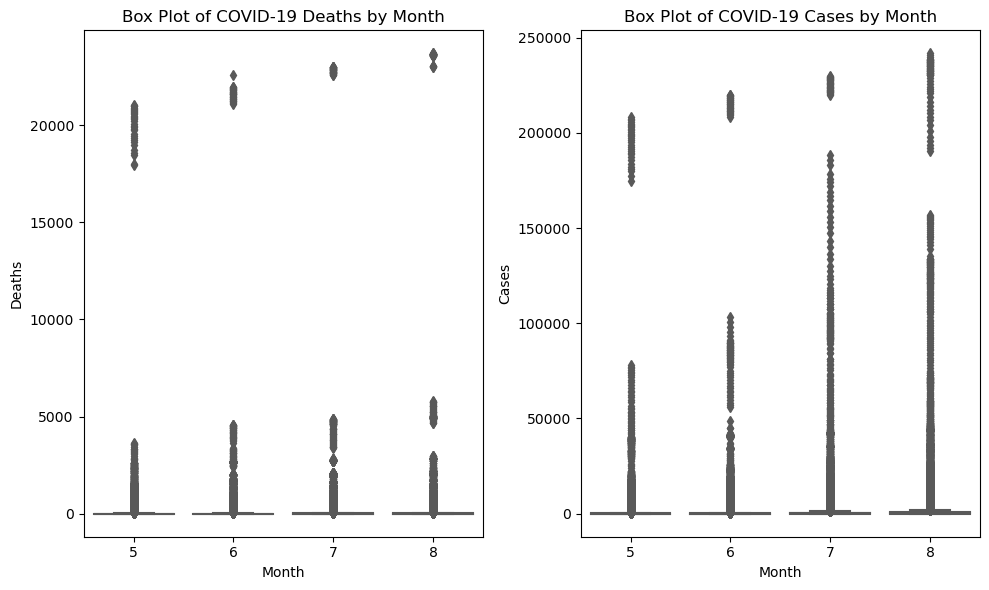

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a DataFrame
file_path = "/Users/bibek/Documents/COVID-19_Project-1/us_counties_covid19_daily.csv"
df = pd.read_csv(file_path)

# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Filter data for the months of May to August (months 5 to 8)
may_to_aug_data = df[(df['date'].dt.month >= 5) & (df['date'].dt.month <= 8)]

# Create a box plot for deaths and cases
plt.figure(figsize=(10, 6))

# Box plot for deaths
plt.subplot(1, 2, 1)
sns.boxplot(x=may_to_aug_data['date'].dt.month, y=may_to_aug_data['deaths'], palette="Set2")
plt.xlabel('Month')
plt.ylabel('Deaths')
plt.title('Box Plot of COVID-19 Deaths by Month')

# Box plot for cases
plt.subplot(1, 2, 2)
sns.boxplot(x=may_to_aug_data['date'].dt.month, y=may_to_aug_data['cases'], palette="Set2")
plt.xlabel('Month')
plt.ylabel('Cases')
plt.title('Box Plot of COVID-19 Cases by Month')

plt.tight_layout()
plt.show()
